In [1]:
import pandas

# Load data

In [2]:
df = pandas.read_csv("data/dataset.csv")

In [3]:
df["TIME"] = pandas.to_datetime(df["TIME"], format="%Y-%m-%d %H:%M:%S")

In [4]:
df = df.sort_values("TIME")

In [5]:
df

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,1,2018-08-01 12:30:02,2018-08-01 12:26:05,CLARENDON ROW,31,1,30,Open,Clarendon Row,53.340927,-6.262501
12558,93,2018-08-01 12:30:02,2018-08-01 12:26:33,HEUSTON STATION (CENTRAL),40,40,0,Open,Heuston Station (Central),53.346603,-6.296924
12420,92,2018-08-01 12:30:02,2018-08-01 12:18:49,HEUSTON BRIDGE (NORTH),40,38,2,Open,Heuston Bridge (North),53.347801,-6.292432
1794,14,2018-08-01 12:30:02,2018-08-01 12:20:28,FOWNES STREET UPPER,30,4,26,Open,Fownes Street Upper,53.344604,-6.263371
12282,91,2018-08-01 12:30:02,2018-08-01 12:26:27,SOUTH DOCK ROAD,30,10,20,Open,South Dock Road,53.341831,-6.231291
...,...,...,...,...,...,...,...,...,...,...,...
41898403,32,2023-12-26 00:30:03,2023-12-26 00:28:13,PEARSE STREET,30,24,6,OPEN,Pearse Street,53.344300,-6.250430
41898402,31,2023-12-26 00:30:03,2023-12-26 00:27:36,PARNELL STREET,20,5,15,OPEN,Parnell Street,53.350900,-6.265120
41898401,30,2023-12-26 00:30:03,2023-12-26 00:21:52,PARNELL SQUARE NORTH,20,18,2,OPEN,Parnell Square North,53.353500,-6.265310
41898398,27,2023-12-26 00:30:03,2023-12-26 00:28:18,MOLESWORTH STREET,20,10,10,OPEN,Molesworth Street,53.341300,-6.258120


In [6]:
print("Count of Bike Stands - AVAILABLE BIKE STANDS == AVAILABLE BIKES")
print((df["BIKE STANDS"]-df["AVAILABLE BIKE STANDS"] == df["AVAILABLE BIKES"]).value_counts())

Count of Bike Stands - AVAILABLE BIKE STANDS == AVAILABLE BIKES
True     39774829
False     2123657
Name: count, dtype: int64


In [7]:
gaps = df["TIME"].diff()

In [8]:
gaps.sort_values()

12558       0 days 00:00:00
27865098    0 days 00:00:00
27864234    0 days 00:00:00
27852138    0 days 00:00:00
27865386    0 days 00:00:00
                 ...       
15642258    5 days 00:30:25
15784629    6 days 23:45:25
15834586    8 days 07:30:28
10228383   18 days 15:30:00
0                       NaT
Name: TIME, Length: 41898486, dtype: timedelta64[ns]

In [9]:
minDate = min(df["TIME"])
maxDate = max(df["TIME"])
largestGap = df["TIME"].diff().max()

print(f"Date ranges from {minDate} to {maxDate}. Largest gap between dates is {largestGap}")

Date ranges from 2018-08-01 12:30:02 to 2023-12-26 00:30:03. Largest gap between dates is 18 days 15:30:00


# Load weather

In [10]:
weather = pandas.read_csv("data/phoenixParkWeather.csv")

/tmp/ipykernel_101804/4020597585.py:1: DtypeWarning: Columns (8,9,14,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pandas.read_csv("data/phoenixParkWeather.csv")


In [11]:
weather["date"] = pandas.to_datetime(weather["date"], format="%d-%b-%Y %H:%M")

In [12]:
weather = weather.rename(columns={"date": "TIME"})

In [13]:
weather = weather.sort_values("TIME")

# Combine weather and bike data

In [14]:
data = pandas.merge_asof(df, weather, on="TIME", direction="backward")

In [15]:
data

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1,2018-08-01 12:30:02,2018-08-01 12:26:05,CLARENDON ROW,31,1,30,Open,Clarendon Row,53.340927,...,2,6,2,200,63,86,0.0,4000,20,8
1,93,2018-08-01 12:30:02,2018-08-01 12:26:33,HEUSTON STATION (CENTRAL),40,40,0,Open,Heuston Station (Central),53.346603,...,2,6,2,200,63,86,0.0,4000,20,8
2,92,2018-08-01 12:30:02,2018-08-01 12:18:49,HEUSTON BRIDGE (NORTH),40,38,2,Open,Heuston Bridge (North),53.347801,...,2,6,2,200,63,86,0.0,4000,20,8
3,14,2018-08-01 12:30:02,2018-08-01 12:20:28,FOWNES STREET UPPER,30,4,26,Open,Fownes Street Upper,53.344604,...,2,6,2,200,63,86,0.0,4000,20,8
4,91,2018-08-01 12:30:02,2018-08-01 12:26:27,SOUTH DOCK ROAD,30,10,20,Open,South Dock Road,53.341831,...,2,6,2,200,63,86,0.0,4000,20,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41898481,32,2023-12-26 00:30:03,2023-12-26 00:28:13,PEARSE STREET,30,24,6,OPEN,Pearse Street,53.344300,...,2,6,2,290,2,81,0.0,25000,999,1
41898482,31,2023-12-26 00:30:03,2023-12-26 00:27:36,PARNELL STREET,20,5,15,OPEN,Parnell Street,53.350900,...,2,6,2,290,2,81,0.0,25000,999,1
41898483,30,2023-12-26 00:30:03,2023-12-26 00:21:52,PARNELL SQUARE NORTH,20,18,2,OPEN,Parnell Square North,53.353500,...,2,6,2,290,2,81,0.0,25000,999,1
41898484,27,2023-12-26 00:30:03,2023-12-26 00:28:18,MOLESWORTH STREET,20,10,10,OPEN,Molesworth Street,53.341300,...,2,6,2,290,2,81,0.0,25000,999,1


In [16]:
data["BIKE USAGE"] = 1-(data["AVAILABLE BIKES"]/(data["AVAILABLE BIKES"]+data["AVAILABLE BIKE STANDS"]))

In [17]:
# Day of week ranges 0-6 whereas month ranges 1-12. Make ranges equal.
data["DAY OF WEEK"] = data["TIME"].dt.dayofweek
data["MONTH OF YEAR"] = data["TIME"].dt.month-1
data["HOUR OF DAY"] = data["TIME"].dt.hour
data["MINUTE OF HOUR"] = data["TIME"].dt.minute

In [18]:
data

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,...,w,sun,vis,clht,clamt,BIKE USAGE,DAY OF WEEK,MONTH OF YEAR,HOUR OF DAY,MINUTE OF HOUR
0,1,2018-08-01 12:30:02,2018-08-01 12:26:05,CLARENDON ROW,31,1,30,Open,Clarendon Row,53.340927,...,86,0.0,4000,20,8,0.032258,2,7,12,30
1,93,2018-08-01 12:30:02,2018-08-01 12:26:33,HEUSTON STATION (CENTRAL),40,40,0,Open,Heuston Station (Central),53.346603,...,86,0.0,4000,20,8,1.000000,2,7,12,30
2,92,2018-08-01 12:30:02,2018-08-01 12:18:49,HEUSTON BRIDGE (NORTH),40,38,2,Open,Heuston Bridge (North),53.347801,...,86,0.0,4000,20,8,0.950000,2,7,12,30
3,14,2018-08-01 12:30:02,2018-08-01 12:20:28,FOWNES STREET UPPER,30,4,26,Open,Fownes Street Upper,53.344604,...,86,0.0,4000,20,8,0.133333,2,7,12,30
4,91,2018-08-01 12:30:02,2018-08-01 12:26:27,SOUTH DOCK ROAD,30,10,20,Open,South Dock Road,53.341831,...,86,0.0,4000,20,8,0.333333,2,7,12,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41898481,32,2023-12-26 00:30:03,2023-12-26 00:28:13,PEARSE STREET,30,24,6,OPEN,Pearse Street,53.344300,...,81,0.0,25000,999,1,0.800000,1,11,0,30
41898482,31,2023-12-26 00:30:03,2023-12-26 00:27:36,PARNELL STREET,20,5,15,OPEN,Parnell Street,53.350900,...,81,0.0,25000,999,1,0.250000,1,11,0,30
41898483,30,2023-12-26 00:30:03,2023-12-26 00:21:52,PARNELL SQUARE NORTH,20,18,2,OPEN,Parnell Square North,53.353500,...,81,0.0,25000,999,1,0.900000,1,11,0,30
41898484,27,2023-12-26 00:30:03,2023-12-26 00:28:18,MOLESWORTH STREET,20,10,10,OPEN,Molesworth Street,53.341300,...,81,0.0,25000,999,1,0.500000,1,11,0,30


In [34]:
data = data.dropna()

In [20]:
data = data.set_index(data["TIME"])

In [21]:
data = data.sort_index()

# Data splits

In [35]:
prePandemic = data[:"2020-03-27"]
pandemic = data["2020-03-27":"2022-02-28"]
postPandemic = data["2022-02-28":]

In [36]:
total = len(prePandemic)
trainPercent = 0.7
valPercent   = 0.2
testPercent  = 0.1

trainExamples = int(total*trainPercent)
valExamples   = int(total*valPercent)
testExamples  = int(total*testPercent)

train = prePandemic[:trainExamples]
val   = prePandemic[trainExamples:trainExamples+valExamples]
test  = prePandemic[trainExamples+valExamples:trainExamples+valExamples+testExamples]

trainStart = train.head(1)["TIME"].iloc[0]
valStart   = val.head(1)["TIME"].iloc[0]
testStart  = test.head(1)["TIME"].iloc[0]
testEnd    = test.tail(1)["TIME"].iloc[0]

print(f"{total} total datapoints.")
print(f"{trainExamples} ({trainPercent*100}%) training datapoints from {trainStart} to {valStart}.")
print(f"{valExamples} ({valPercent*100}%) validation datapoints from {valStart} to {testStart}.")
print(f"{testExamples} ({testPercent*100}%) testing datapoints from {testStart} to {testEnd}.")

17628483 total datapoints.
12339938 (70.0%) training datapoints from 2018-08-01 12:30:02 to 2019-09-07 16:35:02.
3525696 (20.0%) validation datapoints from 2019-09-07 16:35:02 to 2020-01-31 12:20:02.
1762848 (10.0%) testing datapoints from 2020-01-31 12:20:02 to 2020-03-27 23:55:02.


# Visualization, Baselines and Evaluation

In [37]:
from matplotlib import pyplot as plt
import matplotlib

Text(0, 0.5, 'Bike Usage')

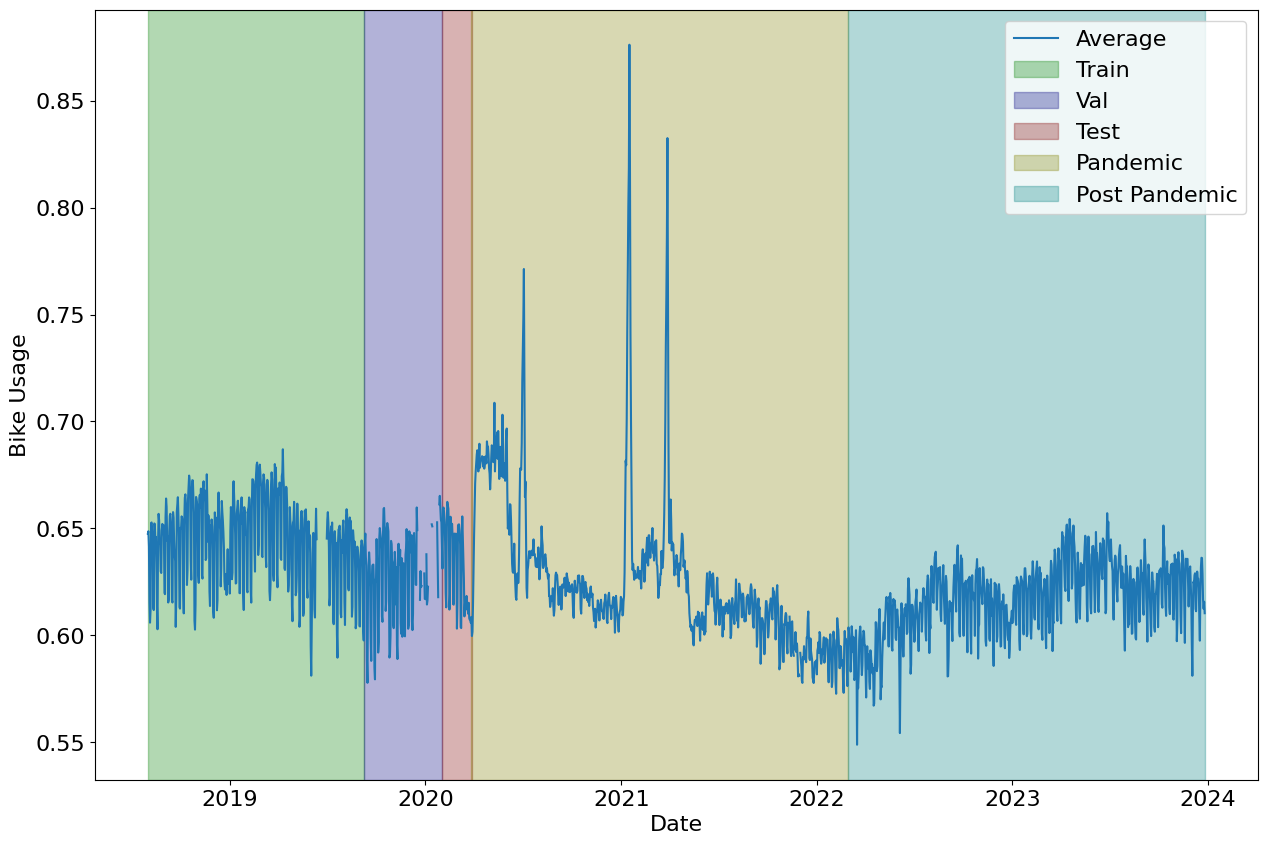

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ax.plot(data.resample("D")["BIKE USAGE"].mean(), label="Average")
#ax.plot(data.loc[data["ADDRESS"] == "Pearse Street"].resample("D")["BIKE USAGE"].mean(), label="Pearse Street", color=(0.5, 0.5, 0.0))

ranges = [(trainStart, valStart), (valStart, testStart), (testStart, testEnd), ("2020-03-27", "2022-02-28"), ("2022-02-28", postPandemic.tail(1)["TIME"].iloc[0])]
labels = ["Train", "Val", "Test", "Pandemic", "Post Pandemic"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3), (0.5, 0.0, 0.0, 0.3), (0.5, 0.5, 0.0, 0.3), (0.0, 0.5, 0.5, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

ax.legend(loc="upper right")
ax.set_xlabel("Date")
ax.set_ylabel("Bike Usage")

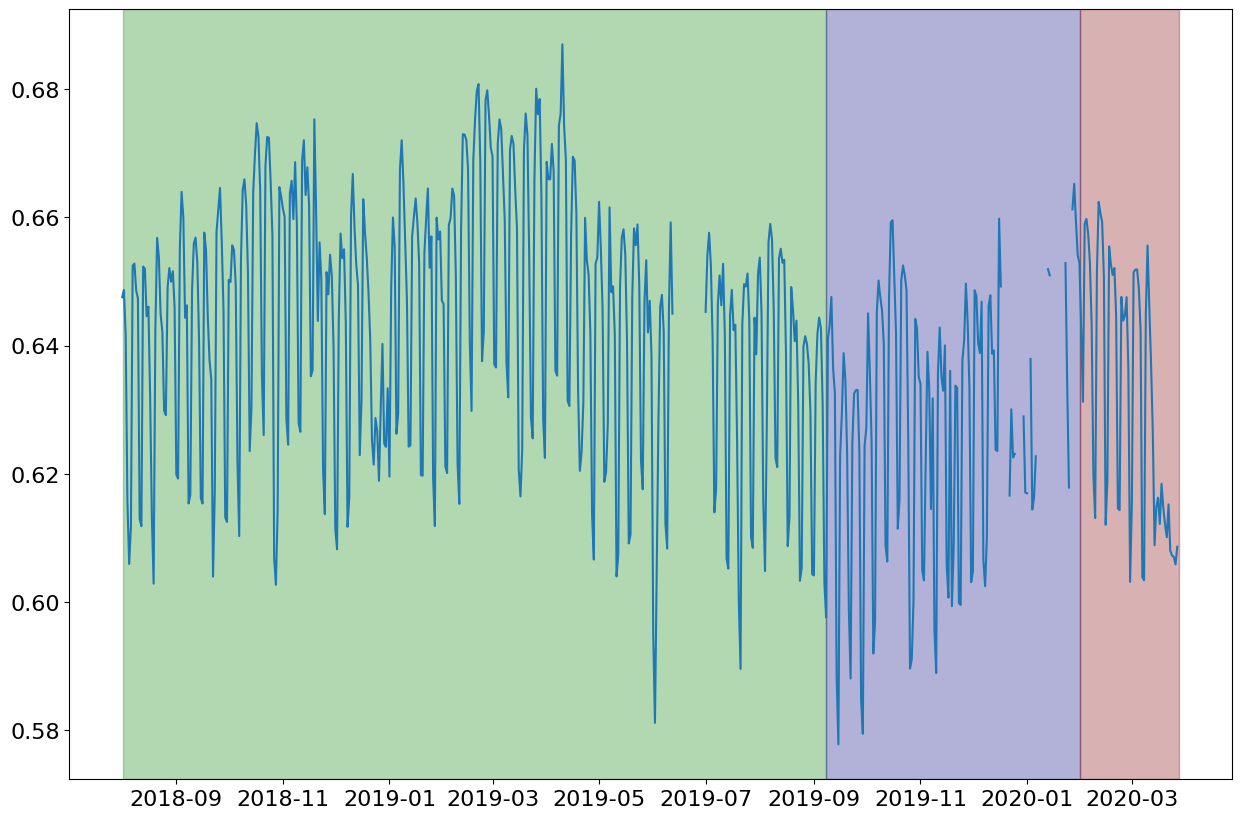

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ranges = [(trainStart, valStart), (valStart, testStart), (testStart, testEnd)]
labels = ["Train", "Val", "Test"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3), (0.5, 0.0, 0.0, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

ax.plot(prePandemic.resample("D")["BIKE USAGE"].mean())

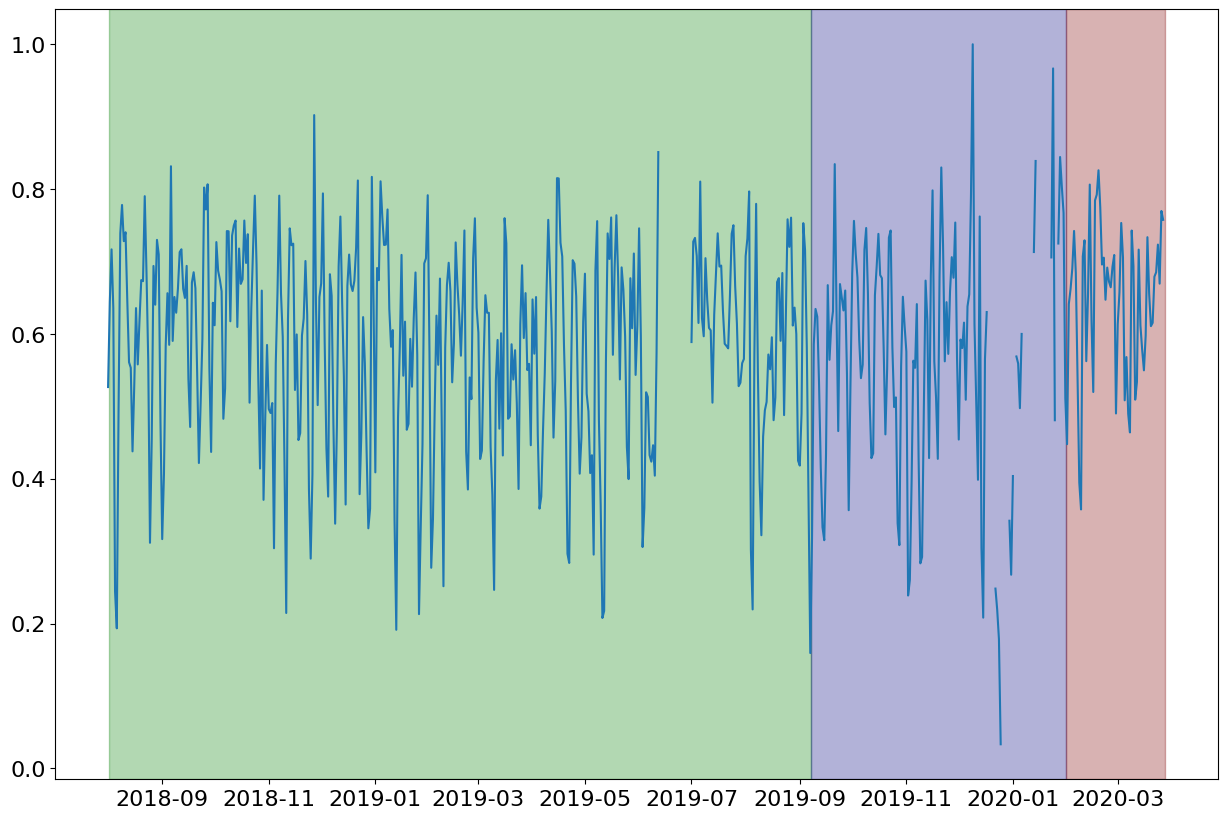

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ranges = [(trainStart, valStart), (valStart, testStart), (testStart, testEnd)]
labels = ["Train", "Val", "Test"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3), (0.5, 0.0, 0.0, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

ax.plot(prePandemic.loc[prePandemic["ADDRESS"] == "Pearse Street"].resample("D")["BIKE USAGE"].mean())

## Evaluation

In [41]:
from sklearn.metrics import mean_absolute_error
import random

In [288]:
avgs = train.groupby(["STATION ID", "DAY OF WEEK", "HOUR OF DAY"])["BIKE USAGE"].mean()

In [296]:
for key in avgs.keys():
    if len(key) != 3:
        print("WRONG "+len(key))

In [297]:
class AveragePredictor:
    keyset_to_average = {}
    overall_average = 0.0
    
    def __init__(self, keyFeatures=["STATION ID", "DAY OF WEEK", "HOUR OF DAY"]):
        self.keyFeatures = keyFeatures

    def train(self, dataframe):
        averages = dataframe.groupby(self.keyFeatures)["BIKE USAGE"].mean()
        for key in averages.keys():
            if len(key) != 3:
                print("WRONG "+len(key))
            self.keyset_to_average[key] = averages[key]
        overall_average = dataframe["BIKE USAGE"].mean()

    def predict(self, dataframe):
        def lookup(key):
            key = tuple(key)
            if key in self.keyset_to_average:
                return self.keyset_to_average[key]
            else:
                return self.overall_average
        return dataframe[self.keyFeatures].apply(lookup, axis=1, raw=True)

    def evaluate(self, dataframe, metric):
        y_true = dataframe["BIKE USAGE"]
        y_pred = self.predict(dataframe)
        
        return metric(y_true, y_pred)

In [298]:
baseline = AveragePredictor()

In [299]:
baseline.train(train)

In [301]:
baseline.evaluate(train, mean_absolute_error)

0.15671109952600282

In [302]:
baseline.evaluate(val, mean_absolute_error)

0.16398983199107284

In [128]:
baselineNoStation = AveragePredictor(keyFeatures=["DAY OF WEEK", "HOUR OF DAY"])
baselineNoStation.train(train)

In [305]:
prePandemicPreds = baseline.predict(prePandemic)

In [129]:
ppns = baselineNoStation.predict(prePandemic)

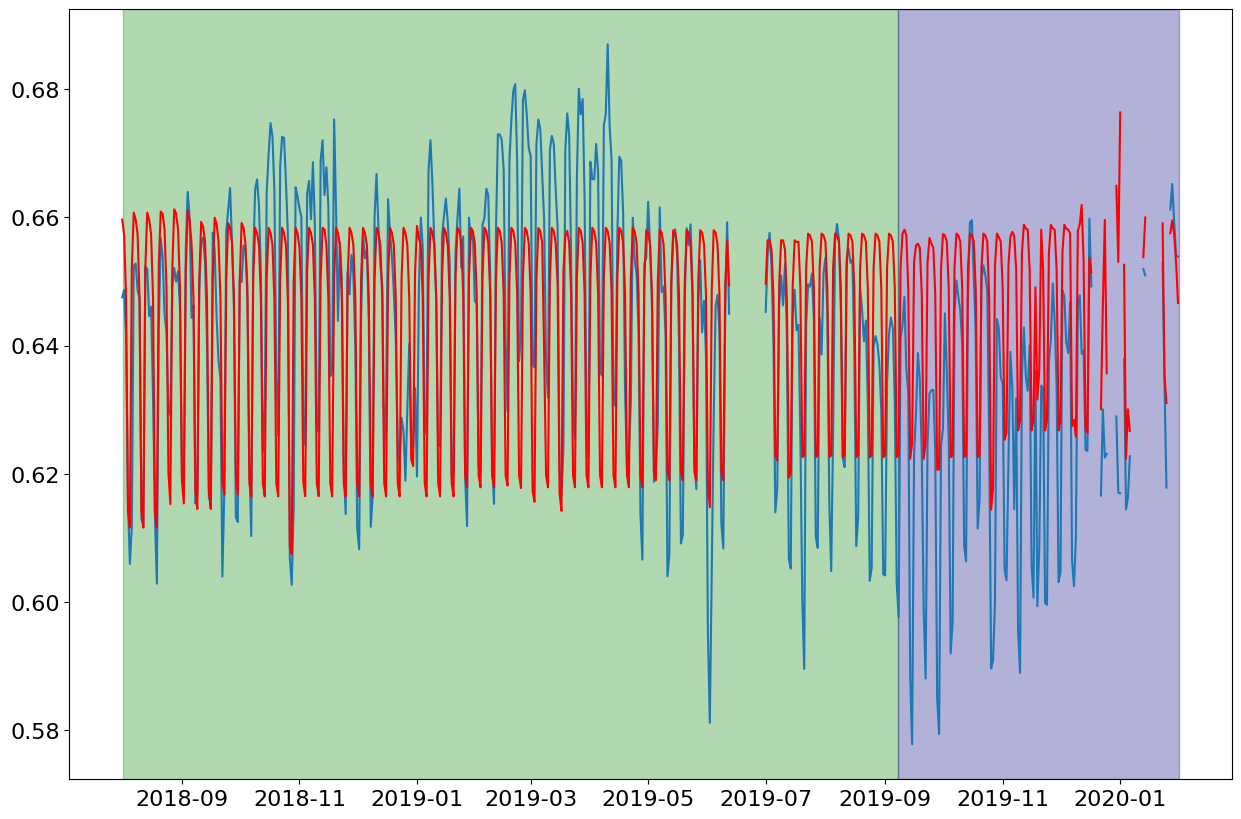

In [307]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ranges = [(trainStart, valStart), (valStart, testStart)]
labels = ["Train", "Val"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

ax.plot(prePandemic[:testStart].resample("D")["BIKE USAGE"].mean(), label="Ground Truth")
ax.plot(prePandemicPreds[:testStart].resample("D").mean(), label="Predictions", color=(1, 0.0, 0.0))

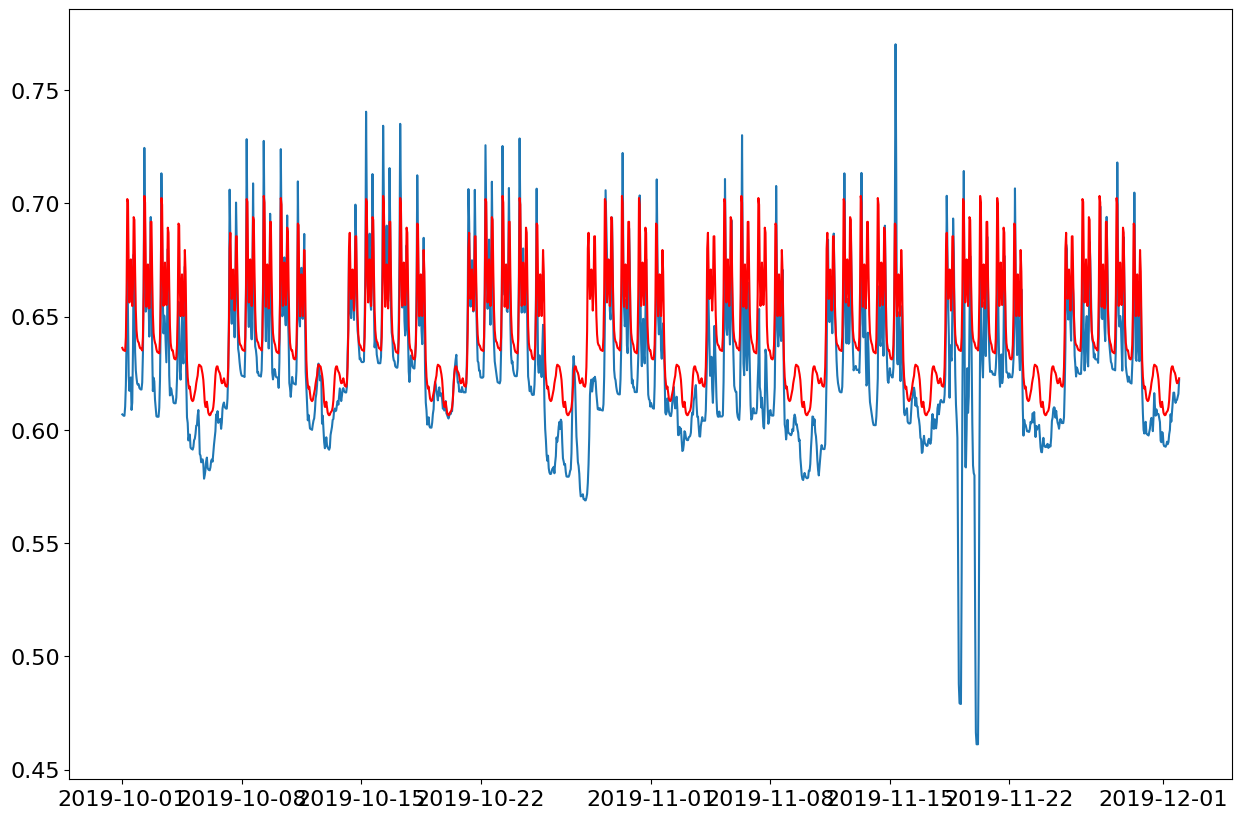

In [308]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

#range = ("2020-01-24", "2020-01-31")
range = ("2019-10-01", "2019-12-01")

ax.plot(prePandemic[range[0]:range[1]].resample("H")["BIKE USAGE"].mean(), label="Ground Truth")
ax.plot(ppns[range[0]:range[1]].resample("H").mean(), label="Predictions", color=(1, 0.0, 0.0))

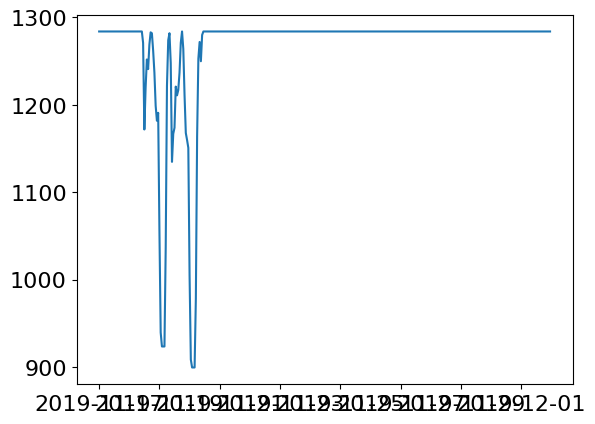

In [315]:
plt.plot(prePandemic[range[0]:range[1]].resample("H")["BIKE USAGE"].count())

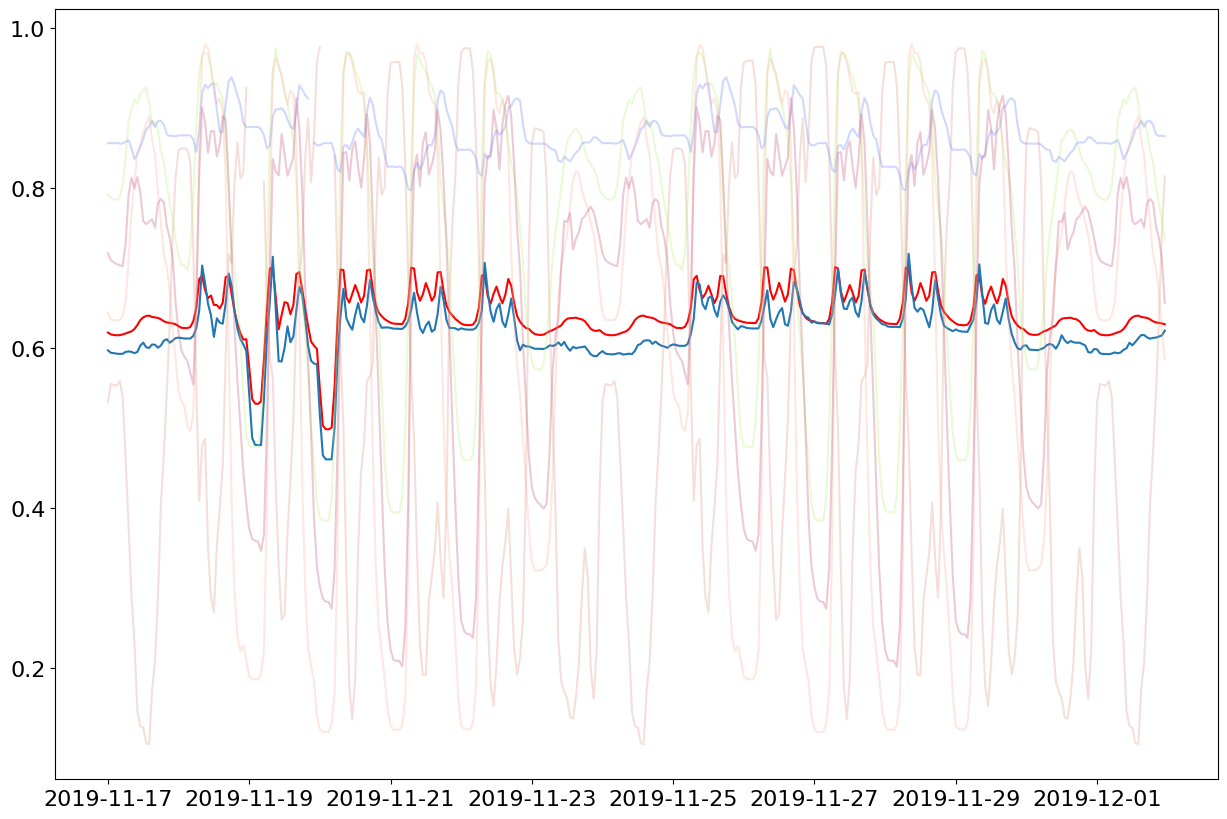

In [309]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

#range = ("2020-01-24", "2020-01-31")
range = ("2019-11-17", "2019-12-01")

#groundTruth = prePandemic.loc[prePandemic["ADDRESS"] == "Heuston Station (Central)"][range[0]:range[1]].resample("H")["BIKE USAGE"].mean()
#preds = prePandemicPreds.loc[prePandemic["ADDRESS"] == "Heuston Station (Central)"][range[0]:range[1]].resample("H").mean()

groundTruth = prePandemic[range[0]:range[1]].resample("H")["BIKE USAGE"].mean()

preds = prePandemicPreds[range[0]:range[1]].resample("H").mean()
ax.plot(preds, label="Predictions for all", color=(1.0, 0.0, 0.0))

ax.plot(groundTruth, label="Ground Truth")
for address in random.sample(list(prePandemic["ADDRESS"].unique()), 5):
    preds = prePandemicPreds.loc[prePandemic["ADDRESS"] == address][range[0]:range[1]].resample("H").mean()
    ax.plot(preds, label="Predictions for "+address, color=(random.random(), random.random(), random.random(), 0.3))

In [311]:
baseline.keyset_to_average

{(1, 0, 0): 0.8100238146785018,
 (1, 0, 1): 0.8099389712292938,
 (1, 0, 2): 0.8103616813294233,
 (1, 0, 3): 0.8117557912968175,
 (1, 0, 4): 0.7997329869380096,
 (1, 0, 5): 0.7110799438990183,
 (1, 0, 6): 0.5331240528252869,
 (1, 0, 7): 0.43195191158900836,
 (1, 0, 8): 0.3569804467485919,
 (1, 0, 9): 0.29588959427669104,
 (1, 0, 10): 0.24054706659120922,
 (1, 0, 11): 0.2051092981513154,
 (1, 0, 12): 0.14943623058542413,
 (1, 0, 13): 0.29360812425328553,
 (1, 0, 14): 0.42778720996038483,
 (1, 0, 15): 0.5134314937619422,
 (1, 0, 16): 0.6259931302270012,
 (1, 0, 17): 0.7671632317801672,
 (1, 0, 18): 0.8781611779251433,
 (1, 0, 19): 0.9259076093065078,
 (1, 0, 20): 0.9472818553070323,
 (1, 0, 21): 0.9532370071684588,
 (1, 0, 22): 0.9013150500168596,
 (1, 0, 23): 0.9204749103942653,
 (1, 1, 0): 0.93290770609319,
 (1, 1, 1): 0.935483870967742,
 (1, 1, 2): 0.935483870967742,
 (1, 1, 3): 0.9355962684050804,
 (1, 1, 4): 0.9256272401433692,
 (1, 1, 5): 0.83565188172043,
 (1, 1, 6): 0.698493310468

In [184]:
i = iter(baseline.keyset_to_average.keys())

In [266]:
next(i)

(1, 3, 9)

In [281]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(prePandemicPreds[range[0]:range[1]].resample("H").mean())

TIME
2019-11-17 00:00:00    0.619647
2019-11-17 01:00:00    0.617309
2019-11-17 02:00:00    0.616494
2019-11-17 03:00:00    0.616243
2019-11-17 04:00:00    0.616358
2019-11-17 05:00:00    0.617224
2019-11-17 06:00:00    0.618472
2019-11-17 07:00:00    0.619879
2019-11-17 08:00:00    0.621073
2019-11-17 09:00:00    0.624036
2019-11-17 10:00:00    0.628983
2019-11-17 11:00:00    0.635183
2019-11-17 12:00:00    0.638653
2019-11-17 13:00:00    0.640351
2019-11-17 14:00:00    0.640755
2019-11-17 15:00:00    0.639143
2019-11-17 16:00:00    0.638512
2019-11-17 17:00:00    0.637917
2019-11-17 18:00:00    0.636137
2019-11-17 19:00:00    0.633701
2019-11-17 20:00:00    0.632323
2019-11-17 21:00:00    0.631719
2019-11-17 22:00:00    0.630985
2019-11-17 23:00:00    0.630038
2019-11-18 00:00:00    0.627549
2019-11-18 01:00:00    0.625515
2019-11-18 02:00:00    0.625283
2019-11-18 03:00:00    0.625110
2019-11-18 04:00:00    0.626754
2019-11-18 05:00:00    0.633755
2019-11-18 06:00:00    0.650176
201

In [172]:
for address in random.sample(list(prePandemic["ADDRESS"].unique()), 2):
    print(address)
    print(prePandemic.loc[prePandemic["ADDRESS"] == address][["DAY OF WEEK", "HOUR OF DAY"]].value_counts())

Townsend Street
DAY OF WEEK  HOUR OF DAY
1            6              996
             7              995
             8              993
             5              985
             2              984
                           ... 
5            6              918
             21             916
2            0              915
5            23             912
             22             911
Name: count, Length: 168, dtype: int64
Convention Centre
DAY OF WEEK  HOUR OF DAY
1            7              995
             8              993
             6              985
             9              984
             10             979
                           ... 
5            6              918
             21             916
2            0              915
5            23             912
             22             911
Name: count, Length: 168, dtype: int64
